In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os   
load_dotenv()

True

In [2]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash",
    api_key=os.getenv("GOOGLE_API"))

In [3]:
class BlogSate(TypedDict):
    title:str
    outline:str
    content:str
    evalute:int

In [4]:
graph = StateGraph(BlogSate)

In [5]:
def create_outline(state:BlogSate)->BlogSate:

    ##fetch title
    title = state["title"]
    prompt= f"Genrate the Detailed outline for the blog {title}"
    outline= model.invoke(prompt).content


    state["outline"] = outline

    return state

In [6]:
def create_blog(state:BlogSate)->BlogSate:

    ##fetch title and content
    title = state["title"]
    outline = state["outline"]
    prompt= f"Genrate the blog {title} based on the outline {outline}"
    content= model.invoke(prompt).content

    state["content"] = content

    return state

In [7]:
def evalute_blog(state:BlogSate)->BlogSate:

    ##fetch title and content
    title = state["title"]
    content = state["content"]

    prompt= f"Rate the blog {title} based on the content {content}"
    evalute= model.invoke(prompt).content

    state["evalute"] = evalute

    return state

In [8]:
## ad node

graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)
graph.add_node("evalute_blog",evalute_blog)

In [9]:
#add edges
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog","evalute_blog")
graph.add_edge("create_blog",END)

In [10]:
workflow = graph.compile()

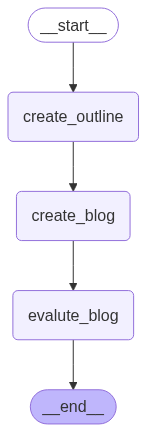

In [11]:
workflow

In [13]:
initial_state = {
    "title":"A Alpha male"
}

final_sate =workflow.invoke(initial_state)




In [14]:
print(final_sate["outline"])

Okay, here's a detailed outline for a blog post titled "The Alpha Male":

**I. Title:** The Alpha Male: Beyond Stereotypes and Towards Authentic Leadership

**II. Introduction:**

*   **A. Hook:** (Choose one, or combine elements)
    *   Start with a controversial statement about the traditional alpha male concept (e.g., "The term 'alpha male' is often misused and misunderstood, leading to harmful stereotypes.")
    *   Ask a question: "What does it *really* mean to be a leader in today's world? Is it about dominance, or something more?"
    *   Share a brief anecdote about a situation where the traditional "alpha" approach failed, highlighting its limitations.
*   **B. Briefly Define the Traditional "Alpha Male" Stereotype:**
    *   Dominant, assertive, aggressive, competitive, emotionally detached, providers.
    *   Mention common associations (e.g., physical strength, financial success, control).
*   **C. Thesis Statement:** (Clearly state the blog's purpose)
    *   "This blog p

In [14]:
print(final_sate["content"])

## The Alpha Male: Beyond the Myth - Redefining Leadership and Confidence

**I. Introduction (Hooking the Reader & Setting the Stage)**

**A. Hook:** Is the alpha male dead? Or is he just evolving? The term conjures up images of chest-thumping, aggressive dominance. But in today's world, does that archetype still hold water?

**B. Background:** The concept of the "alpha male" originated from studies of animal hierarchies, particularly wolves and primates. These studies, often misinterpreted and oversimplified, led to the widespread belief that human societies should also be governed by a dominant male figure. This notion has permeated popular culture, influencing ideas about leadership, success, and masculinity.

**C. Thesis Statement:** The outdated notion of the alpha male as a purely dominant and aggressive figure is harmful and inaccurate. A modern "alpha" is defined by genuine leadership, confident self-awareness, and a commitment to personal growth and positive influence.

**D. B

In [15]:
print(final_sate["evalute"])

Okay, here's an evaluation of the blog post you provided:

**Overall Rating: 8.5/10**

**Strengths:**

*   **Relevant and Timely Topic:** The post tackles a prevalent and often misunderstood concept, offering a much-needed modern perspective on masculinity and leadership.  It acknowledges the problematic aspects of the traditional "alpha male" stereotype, which is crucial in today's social climate.
*   **Well-Structured and Organized:** The post is logically structured, moving from defining the problem to offering a solution and practical advice.  The use of headings and subheadings makes it easy to read and digest.
*   **Clear and Concise Language:** The writing is clear, accessible, and avoids jargon.  It's easy for a wide audience to understand the concepts being discussed.
*   **Strong Arguments and Evidence:** The post provides compelling arguments against the traditional "alpha" stereotype, highlighting its negative consequences for both men and those around them. It effectively 